Uniform Manifold Approximation and Projection for Dimension Reduction, used in molmap to form 2D representation of the features.

can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction.

The algorithm is founded on three assumptions about the data, which, if we want to use the method effectively, should be checked before applying it.

1. The data is uniformly distributed on Riemannian manifold;
2. The Riemannian metric is locally constant (or can be approximated as such);
3. The manifold is locally connected.

From these assumptions it is possible to model the manifold with a fuzzy topological structure. The embedding is found by searching for a low dimensional projection of the data that has the closest possible equivalent fuzzy topological structure.


In [1]:
from sklearn import datasets
import umap
import matplotlib.pyplot as plt

from sklearn.metrics import pairwise_distances

In [2]:

n_points = 1000
noise = 0.5
X, color = datasets.make_swiss_roll(n_points, noise=noise, random_state=42)


In [3]:
method = umap.UMAP(
    n_neighbors=15, # local neighbourhood size
    n_components=2,
    metric='cosine', # pair distance metric
    n_epochs=200,
    learning_rate=1.0,
    init='spectral', # spectral embedding of the fuzzy 1-skeleton
    min_dist=0.1, # used with spread
    spread=1.0, # data scale, i.e. preprocessign necessary
    low_memory=True, # for large datasets
    set_op_mix_ratio=1.0, # pure fuzzy union of local simplicial sets
    local_connectivity=1
)


In [4]:
Y = method.fit_transform(X)

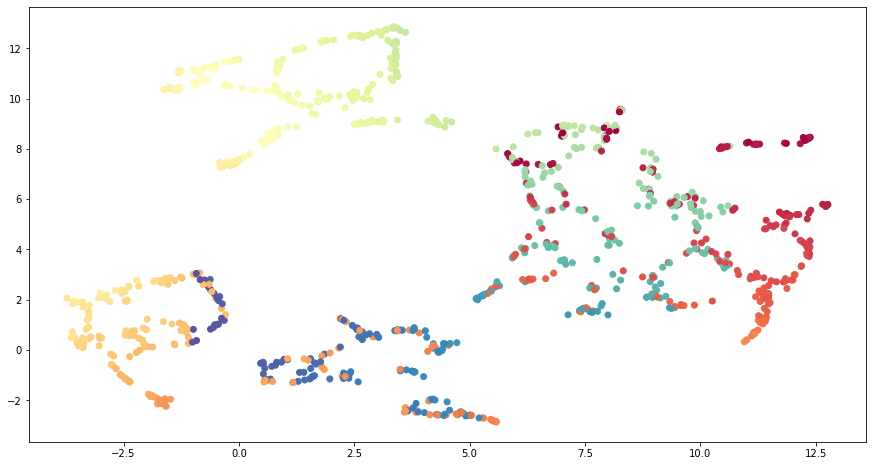

In [5]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral);

In [6]:
d = pairwise_distances(X, metric='cosine')

In [7]:
d.shape

(1000, 1000)

In [8]:
method2 = umap.UMAP(
    n_neighbors=15, # local neighbourhood size
    n_components=2,
    metric='precomputed', # pair distance metric
    n_epochs=200,
    learning_rate=1.0,
    init='spectral', # spectral embedding of the fuzzy 1-skeleton
    min_dist=0.1, # used with spread
    spread=1.0, # data scale, i.e. preprocessign necessary
    low_memory=True, # for large datasets
    set_op_mix_ratio=1.0, # pure fuzzy union of local simplicial sets
    local_connectivity=1
)


In [9]:
Z = method2.fit_transform(d)

/home/ma/miniconda3/envs/molmap/lib/python3.7/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


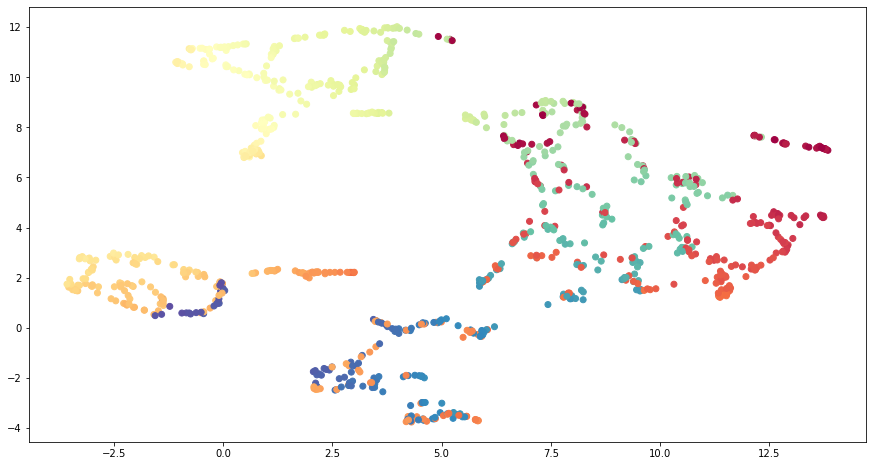

In [10]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.scatter(Z[:, 0], Z[:, 1], c=color, cmap=plt.cm.Spectral);